# EDA Project

In this notebook, you should perform EDA (Exploratory data analysis) on given dataset: real_estate_dataset.csv

We do not want to give you precise steps to follow, but based on previous lessons, you should have an idea what steps are needed and which should not be skipped. In order to guide you just a bit, here are some ideas:

* it is always good to check how many data are missing - and how can we solve missing data in this dataset?
* what data types have different columns?
* what could be set as index? And does it make sense here?
* price column can be for sure better formated
* can we spot some outliers? What method to see outliers can be used?
* Total area can be in metres (we are in Austria) and numeric, loft size as well
* who is the most active broker?
* what is most sold object type?
* can you do nice visualisation of the data?
* is there a correlation between price and size? Can we see it?
* is there any other patterns to discribe?

## What we want to be submitted:
* send us your notebook on github as link and we will give you feedback
* comment everything - explain your thoughts, why you think this column should be dropped, why you did this visualisation, everything.
* you do not have to follow all ideas above, but your analysis should be going from start to end with logical steps
* try to summarize with at least 3 sentences a conclusion on what we can tell about dataset.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
#importing the data set 
real_estate = pd.read_csv('real_estate_dataset.csv',header=0, na_values='NA')
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9076 entries, 0 to 9075
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   url                9076 non-null   object
 1   Address            9076 non-null   object
 2   City               9076 non-null   object
 3   Owner Name         3 non-null      object
 4   Mailing Address    3 non-null      object
 5   Price              9076 non-null   object
 6   Number of Units    9076 non-null   object
 7   Total area         9076 non-null   object
 8   Number Of Stories  9076 non-null   object
 9   Lot Size           9076 non-null   object
 10  Type               9076 non-null   object
 11  Year Built         9076 non-null   object
 12  Other Info         8924 non-null   object
 13  Images             9076 non-null   object
 14  broker             8924 non-null   object
 15  phone              8924 non-null   object
 16  EMAIL              1013 non-null   object


In [101]:
#To get a first glimpse into the dataset, use the .head() method 
real_estate.head(10)

,url,Address,City,Owner Name,Mailing Address,Price,Number of Units,Total area,Number Of Stories,Lot Size,Type,Year Built,Other Info,Images,broker,phone,EMAIL,secondary broker,"phone, 2",Email
0,http://www.loopnet.com/Listing/20157634/6060-E...,"Anchorage, AK 99518 ·","6060 Electron Dr., Anchorage, AK, 99518",ODEX INVESTMENTS V LLC,"1001 4TH AVE STE 4500, SEATTLE, WA 98154","$10,239,431",,,,"680,276 SF",Land,,Hard to find large I-2 site located near the c...,http://x.lnimg.com/photo/poster_1920/cf0cb4964...,Greg Johnson,tel:+19075635500,gregory.c.johnson@noaa.gov,NaN,NaN,NaN
1,http://www.loopnet.com/Listing/18499430/1901-A...,"Fairbanks, AK 99701 ·","1901 Airport Way, Fairbanks, AK, 99701",SEATTLE SC PLAZA 2 LLC,"1331 N CALIFORNIA BLVD STE 170, WALNUT CREEK, ...","$4,050,000",,"10,000 SF",1,3.26 AC,Office,2006,Assessor's Parcel Number 0394921 *Sale include...,http://x.lnimg.com/photo/poster_1920/881647c1b...,Pamela Throop,tel:+19074566008,realty@realtyalaska.com,NaN,NaN,NaN
2,http://www.loopnet.com/Listing/20000996/4510-O...,"Anchorage, AK 99502 ·","4510 Old International Airport Rd 99502, Ancho...",NaN,NaN,"$3,500,000",,"28,521 SF",,1.09 AC,Office,,"Three Story Office Building, Lot size 47,265 s...",http://x.lnimg.com/photo/poster_1920/dc70de703...,Vern Flowers,tel:+19073494761,vernonflowers@shaw.ca,NaN,NaN,NaN
3,http://www.loopnet.com/Listing/19729524/7645-W...,"Wasilla, AK 99654 ·","7645 W. Marigold Drive, Wasilla, AK, 99654",BAKE TECHNOLOGY PARK LLC,"550 NEWPORT CENTER DR, NEWPORT BEACH, CA 92660","$3,267,000",,,,25 AC,Land,,"Approximately 25 acres with 1,200+ ft frontage...",http://x.lnimg.com/photo/poster_1920/afd0e7ef8...,"Carl D. Kuhn, CCIM",tel:+19077625887,cdk@gci.net,NaN,NaN,NaN
4,http://www.loopnet.com/Listing/19535739/171-Mu...,"Anchorage, AK 99504 ·","171 Muldoon Rd, Anchorage, AK, 99504",NaN,NaN,"$5,000,000",,,1,"81,893 SF",Retail,1978,SELLER MOTIVATED! PRICE REDUCED TO 5.0M! 6.62%...,http://x.lnimg.com/photo/poster_1920/1f6d47208...,Doosan Bak,tel:+13105288949,ceo@sicilypizza.com,NaN,NaN,NaN
5,http://www.loopnet.com/Listing/18904819/12130-...,"Eagle River, AK 99577 ·","12130 Regency Drive, Eagle River, AK, 99577",NaN,NaN,"$3,300,000",,"35,962 SF",,"119,354 SF",Special Purpose,,Downtown Eagle River commercial building curre...,http://x.lnimg.com/photo/poster_1920/380f038f8...,Curt Nading,tel:+19075612220,Curt@crealaska.com,Season Baker,tel:+19075612220,NaN
6,http://www.loopnet.com/Listing/20011352/2-Spin...,"Prudhoe Bay, AK 99734 ·","2 Spine Rd #27, Prudhoe Bay, AK, 99734",NaN,NaN,"$16,000,000",,"91,191 SF",,11.54 AC,Industrial,,"-Four structures totaling approximately 90,000...",http://x.lnimg.com/photo/poster_1920/095f4a49a...,Richard Glass,tel:+128158020,richard.glass@windermere.com,NaN,NaN,NaN
7,http://www.loopnet.com/Listing/19655221/550-Br...,"Anchorage, AK 99508 ·","550 Bragaw Street, Anchorage, AK, 99508",NaN,NaN,"$5,500,000",,"37,193 SF",,"306,426 SF",Office,,The Alaska Native Cultural Charter School occu...,http://x.lnimg.com/photo/poster_1920/ad7e9653d...,Marc Dunne,tel:+19072737310,mwdunne@alaska.net,NaN,NaN,NaN
8,http://www.loopnet.com/Listing/20125212/13049-...,"Eagle River, AK 99577 ·","13049 Old Glenn Hwy., Eagle River, AK, 99577",NaN,NaN,"$3,400,000",,"24,519 SF",,,Hotel & Motel,,"24,519 SF Microtel Inn and Suites building for...",http://x.lnimg.com/photo/poster_1920/547058b4b...,Brian Edmondson,tel:+19072427801,brian@commercialak.com,NaN,NaN,NaN
9,http://www.loopnet.com/Listing/18309214/81-E-C...,"Palmer, AK 99645 ·","81 E. Commercial Drive, Palmer, AK, 99645",NaN,NaN,"$4,500,000",,"59,240 SF",1,11.67 SF,Industrial,1983,Large warehouse facility with surplus land & o...,http://x.lnimg.com/photo/poster_1920/57a8aba2b...,Curt Nading,tel:+19075612220,Curt@crealaska.com,Season Baker,tel:+19075612220,NaN


In [37]:
#how much missing data is in the dataset ?
real_estate.isnull().sum()

url                     0
Address                 0
City                    0
Owner Name           9073
Mailing Address      9073
Price                   0
Number of Units         0
Total area              0
Number Of Stories       0
Lot Size                0
Type                    0
Year Built              0
Other Info            152
Images                  0
broker                152
phone                 152
EMAIL                8063
secondary broker     6388
phone, 2             6388
Email                8848
dtype: int64

In [182]:
#displaying the names of the columns to ensure the correct writing, for dropping them in the next step
real_estate2 = real_estate
list(real_estate2.columns)

['url',
 'Address',
 'City',
 'Price',
 'Number of Units',
 'Total area',
 'Number Of Stories',
 'Lot Size',
 'Type',
 'Year Built',
 'Other Info',
 'Images',
 'broker',
 'phone']

In [183]:
#To solve the problem of missing data in the dataset, I drop the columns that don't give additional information 
#'secondary broker'; 'Email' ; 'phone, 2' 'EMAIL'; 'Owner Name'; 'Mailing Address'; 'Owner Name'; 
real_estate2.drop(['secondary broker', 'EMAIL', 'Owner Name', 'Mailing Address', 'phone, 2', 'Email', 'Owner Name', 'Mailing Address'], axis=1, inplace=True)
list(real_estate2.columns)

KeyError: "['secondary broker', 'EMAIL', 'Owner Name', 'Mailing Address', 'phone, 2', 'Email', 'Owner Name', 'Mailing Address'] not found in axis"

In [184]:
#displaying information on uniqueness of the entries in the data set
real_estate2.describe()

,url,Address,City,Price,Number of Units,Total area,Number Of Stories,Lot Size,Type,Year Built,Other Info,Images,broker,phone
count,9076,9076,9076,9076,9076,9076,9076,9076,9076,9076,8924,9076,8924,8924
unique,9076,5031,8812,3544,155,3491,23,4601,13,137,8703,8873,5370,5034
top,http://www.loopnet.com/Listing/20157634/6060-E...,,Access Denied\r\nAccess Denied\r\nYou are in b...,"$3,500,000",,,,,Land,,"""",,Glen Kunofsky,tel:+12124305115
freq,1,152,152,290,8527,4315,6181,1026,3232,5831,44,191,67,67


In [185]:
#to dispay the data types found in the data set
#when first opening the dataset, I found that all the columns were displayed as 'object'
#since many operations are not possible, with object data types, all the columns were changed to the string data type 
real_estate2.dtypes

url                  object
Address              object
City                 object
Price                object
Number of Units      object
Total area           object
Number Of Stories    object
Lot Size             object
Type                 object
Year Built           object
Other Info           object
Images               object
broker               object
phone                object
dtype: object

In [186]:
#what to do about the data types ? 
real_estate2 = real_estate2.astype('string')

In [187]:
real_estate2['Number Of Stories'] = pd.to_numeric(real_estate2['Number Of Stories'], errors='coerce')
real_estate2.dtypes

url                   string
Address               string
City                  string
Price                 string
Number of Units       string
Total area            string
Number Of Stories    float64
Lot Size              string
Type                  string
Year Built            string
Other Info            string
Images                string
broker                string
phone                 string
dtype: object

In [ ]:
#url could be used as an index, since there are no missing values in this column and it has only unique values. 
#I would not set is as an index, as this doesn't really make it easier to understand
#Since there are no duplicate rows, I would use the automatic indexing of a pandas dataframe. 

In [188]:
#to reformat the Price column, the dollar sign at the beginning and the comma can be deleted using regex
real_estate2['Price'] = real_estate2['Price'].replace({'\$': '', ',': ''}, regex = True)
#unsure what to do about the entries, where the price is a range

In [189]:
#since I don't know what to do about the entries where the price is entered as a range, I chose to delete them
r = ~real_estate2['Price'].str.contains('-')
real_estate3 = real_estate2[r]
real_estate3['Price'] = pd.to_numeric(real_estate3['Price'], errors='coerce')
real_estate3

C:\Users\kmiau\AppData\Local\Temp\ipykernel_13020\2795986832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_estate3['Price'] = pd.to_numeric(real_estate3['Price'], errors='coerce')


,url,Address,City,Price,Number of Units,Total area,Number Of Stories,Lot Size,Type,Year Built,Other Info,Images,broker,phone
0,http://www.loopnet.com/Listing/20157634/6060-E...,"Anchorage, AK 99518 ·","6060 Electron Dr., Anchorage, AK, 99518",10239431.0,,,NaN,"680,276 SF",Land,,Hard to find large I-2 site located near the c...,http://x.lnimg.com/photo/poster_1920/cf0cb4964...,Greg Johnson,tel:+19075635500
1,http://www.loopnet.com/Listing/18499430/1901-A...,"Fairbanks, AK 99701 ·","1901 Airport Way, Fairbanks, AK, 99701",4050000.0,,"10,000 SF",1.0,3.26 AC,Office,2006,Assessor's Parcel Number 0394921 *Sale include...,http://x.lnimg.com/photo/poster_1920/881647c1b...,Pamela Throop,tel:+19074566008
2,http://www.loopnet.com/Listing/20000996/4510-O...,"Anchorage, AK 99502 ·","4510 Old International Airport Rd 99502, Ancho...",3500000.0,,"28,521 SF",NaN,1.09 AC,Office,,"Three Story Office Building, Lot size 47,265 s...",http://x.lnimg.com/photo/poster_1920/dc70de703...,Vern Flowers,tel:+19073494761
3,http://www.loopnet.com/Listing/19729524/7645-W...,"Wasilla, AK 99654 ·","7645 W. Marigold Drive, Wasilla, AK, 99654",3267000.0,,,NaN,25 AC,Land,,"Approximately 25 acres with 1,200+ ft frontage...",http://x.lnimg.com/photo/poster_1920/afd0e7ef8...,"Carl D. Kuhn, CCIM",tel:+19077625887
4,http://www.loopnet.com/Listing/19535739/171-Mu...,"Anchorage, AK 99504 ·","171 Muldoon Rd, Anchorage, AK, 99504",5000000.0,,,1.0,"81,893 SF",Retail,1978,SELLER MOTIVATED! PRICE REDUCED TO 5.0M! 6.62%...,http://x.lnimg.com/photo/poster_1920/1f6d47208...,Doosan Bak,tel:+13105288949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9071,http://www.loopnet.com/Listing/19833597/316-Br...,"Thermopolis, WY 82443 ·","316 Broadway, Thermopolis, WY, 82443",495000.0,,"7,205 SF",1.0,"12,600 SF",Office,1961,6337 sq. ft. main level with 868 sq. ft. in ba...,http://x.lnimg.com/photo/poster_1920/e27fd3388...,Christine Johnston,tel:+13078642192
9072,http://www.loopnet.com/Listing/19875908/3005-3...,"Cheyenne, WY 82001 ·","3005 & 3007 Nationway, Cheyenne, WY, 82001",650000.0,,"6,684 SF",NaN,1.49 AC,Industrial,,Price is for 3007 Nationway. 2184 sf DT's Car ...,http://x.lnimg.com/photo/poster_1920/86f41d739...,Larry Sutherland,tel:+13077738455
9073,http://www.loopnet.com/Listing/19627936/12-Lar...,"Boulder, WY 82923 ·","12 Larry Lozier Road, Boulder, WY, 82923",1400000.0,,"4,750 SF",NaN,4.12 AC,Retail,,"The Crossroad Store, or C-Store, is a rare com...",http://x.lnimg.com/photo/poster_1920/bacb01205...,JHREA Commercial,tel:+13076900204
9074,http://www.loopnet.com/Listing/20080133/2688-A...,"Sheridan, WY 82801 ·","2688 Aviation Drive, Sheridan, WY, 82801",381000.0,,"5,000 SF",NaN,,Industrial,2006,Shop space located at Sheridan County Airport ...,http://x.lnimg.com/photo/poster_1920/f289ef3e6...,Bruce Garber,tel:+13076725838


In [190]:
#Total area and lot size are be reformatted to m2 meters
real_estate3['Total area'] = real_estate3['Total area'].replace({'SF': '', ',': ''}, regex = True)
real_estate3['Total area'] = pd.to_numeric(real_estate3['Total area'], errors='coerce')
real_estate3['Total area (m2)'] = real_estate3['Total area']/10.764

C:\Users\kmiau\AppData\Local\Temp\ipykernel_13020\1945246844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_estate3['Total area'] = real_estate3['Total area'].replace({'SF': '', ',': ''}, regex = True)
C:\Users\kmiau\AppData\Local\Temp\ipykernel_13020\1945246844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_estate3['Total area'] = pd.to_numeric(real_estate3['Total area'], errors='coerce')
C:\Users\kmiau\AppData\Local\Temp\ipykernel_13020\1945246844.py:4: SettingWithCopyWarning: 
A value

In [191]:
list(real_estate3.columns)

['url',
 'Address',
 'City',
 'Price',
 'Number of Units',
 'Total area',
 'Number Of Stories',
 'Lot Size',
 'Type',
 'Year Built',
 'Other Info',
 'Images',
 'broker',
 'phone',
 'Total area (m2)']

In [193]:
#make a column that tells me type of measurement
real_estate3.loc[real_estate3['Lot Size'].str.contains('SF'), 'unit'] = 'SF'
real_estate3.loc[real_estate3['Lot Size'].str.contains('AC'), 'unit'] = 'AC'
real_estate3['Lot Size'] = real_estate3['Lot Size'].replace({'SF': '', ',': '', 'AC': ''}, regex = True)
real_estate3['Lot Size'] = pd.to_numeric(real_estate3['Lot Size'], errors='coerce')

C:\Users\kmiau\AppData\Local\Temp\ipykernel_13020\705744645.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_estate3['Lot Size'] = real_estate3['Lot Size'].replace({'SF': '', ',': '', 'AC': ''}, regex = True)
C:\Users\kmiau\AppData\Local\Temp\ipykernel_13020\705744645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_estate3['Lot Size'] = pd.to_numeric(real_estate3['Lot Size'], errors='coerce')


In [ ]:
real_estate3.loc[real_estate3['unit']=='SF', 'Lot Size']/10.764
real_estate3.loc[real_estate3['unit']=='AC', 'Lot Size']*4046.856
real_estate3.head()

In [246]:
#I tried to reformat the 'Lot size' column to meters, but it didn't work. 
# tried various if statement setups, but it didn't work

<AxesSubplot:xlabel='Price', ylabel='Type'>

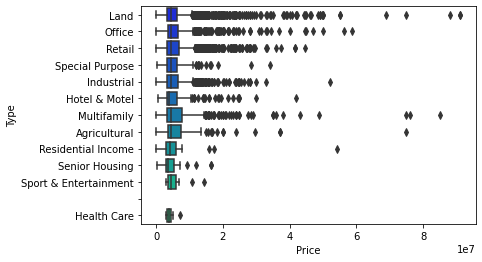

In [217]:
#can we spot outliers, what method can be used ? 
sns.boxplot(y = 'Type', x = 'Price', data = real_estate3, palette='winter')
#it seems like there are some really expensive Prices, that could be counted as outliers

In [244]:
#counting what is most sold object type
real_estate3.groupby('Type').size()
#the most sold object type seems to be 'Land'

Type
                          152
Agricultural              148
Health Care                 8
Hotel & Motel             271
Industrial               1183
Land                     2918
Multifamily               588
Office                   1040
Residential Income         45
Retail                   2147
Senior Housing             27
Special Purpose           186
Sport & Entertainment      23
dtype: int64

In [155]:
#comparing the activity of the broker
howmany = real_estate3.groupby('broker').size()
howmany.sort_values()
#it seems like 'Glen Kunofsky' is the most active broker, since his name was found 67 times in the data set

broker
Jonas Skovdal               1
Scott Krause                1
Scott Koethe, CCIM          1
Scott Knowles               1
John Moody                  1
                           ..
Brad Feller                16
Doug Passon                22
Patrick R. Luther, CCIM    22
Alvin Mansour              33
Glen Kunofsky              67
Length: 5238, dtype: int64

In [245]:
# correlation between price and size 
print(real_estate3['Price'].corr(real_estate3['Total area (m2)']))
#it doesn't look like there is a large correlation between these two features

0.2861472200646499


In [247]:
#CONCLUSION
#The dataset shows a very diverse set of real estate that has been sold over a large time period. 
#Most of what was sold is 'land' and the prices seem to vary a lot, but are not necessarily correlated to total area alone. 
#The dataset seemed to be ok to work with from the beginning, but more data cleaning will be necessary to work with it further. 